# Vježba 6 - Frekvencijska analiza signala korištenjem DFT

DFT je u Pythonu-u implementirana FFT algoritmom iz Numpy biblioteke. Uputstvo za korištenje funkcija <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft">fft</a> i <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html#numpy.fft.ifft">ifft</a> je moguće pronaći u zvaničnoj Numpy dokumentaciji.

## DFT periodičnih signala

1. Dat je diskretni signal $x(n) = cos(n \pi / 3)$. Da li je dati signal periodičan? Ako jeste, odrediti njegov period. U Pythonu-u generisati odmjerke datog signala na jednom periodu. Nacrtati talasni oblik signala. 

In [8]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
import numpy as np
import numpy.fft as fft

<IPython.core.display.Javascript object>


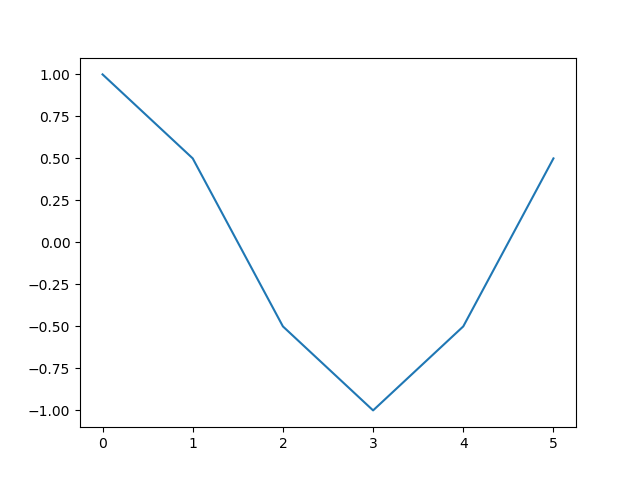

In [26]:
### KOD
N = 6
n = np.arange(0, N)
x = np.cos(np.pi * n / 3)
pyplot.figure()
pyplot.plot(n, x)

2. Izračunati DFT datog signala bez dopunjavanja nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


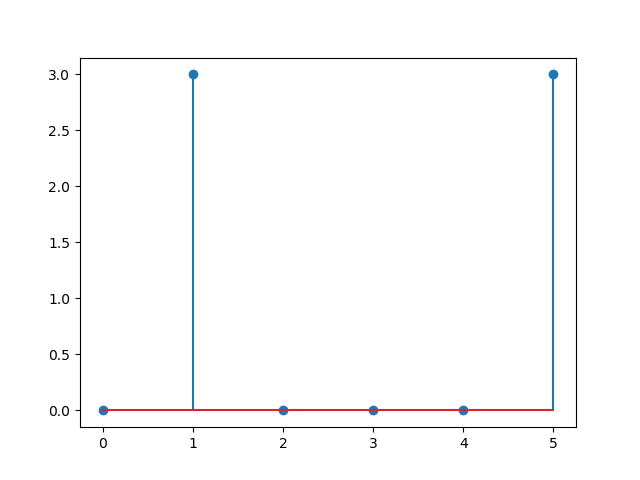

<StemContainer object of 3 artists>

In [27]:
### KOD
xDft = fft.fft(x, N)
pyplot.figure()
pyplot.stem(np.abs(xDft))

3. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB.

<IPython.core.display.Javascript object>


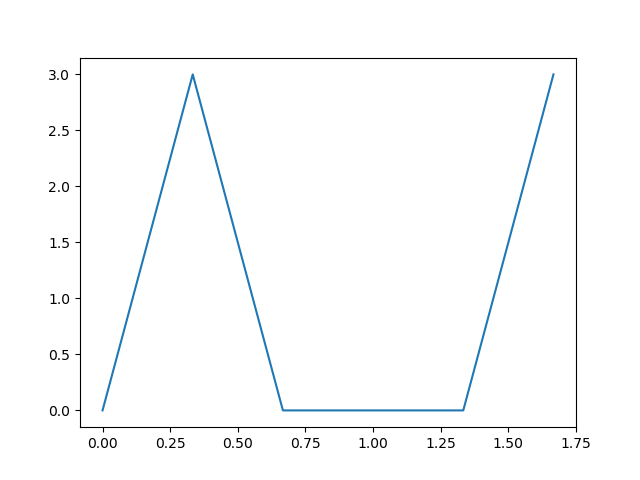

<IPython.core.display.Javascript object>


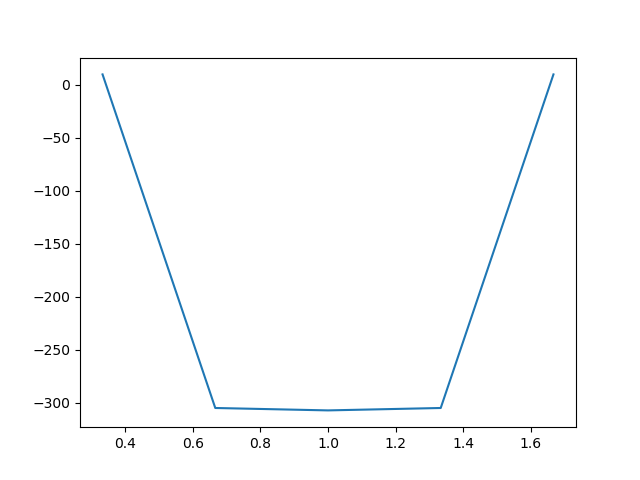

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [28]:
### KOD
pyplot.figure()
time = (2 * n) / N
pyplot.plot(time, np.abs(xDft))
pyplot.figure()
pyplot.plot(time, 20 * np.log10(np.abs(xDft)))

4. Generisati odmjerke signala iz tačke 1. na tri perioda. Nacrtati njegov talasni oblik.

<IPython.core.display.Javascript object>


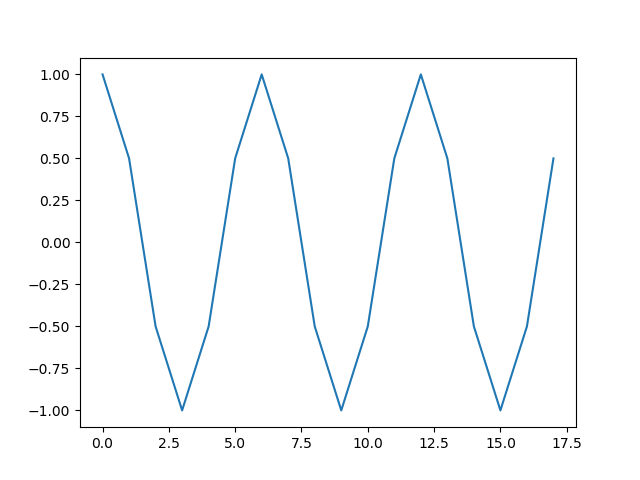

In [29]:
### KOD
pyplot.figure()
n = np.arange(0, N * 3)
x = np.cos(np.pi * n / 3)
pyplot.plot(n, x)

5. Izračunati DFT datog signala bez dopunjavanja nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


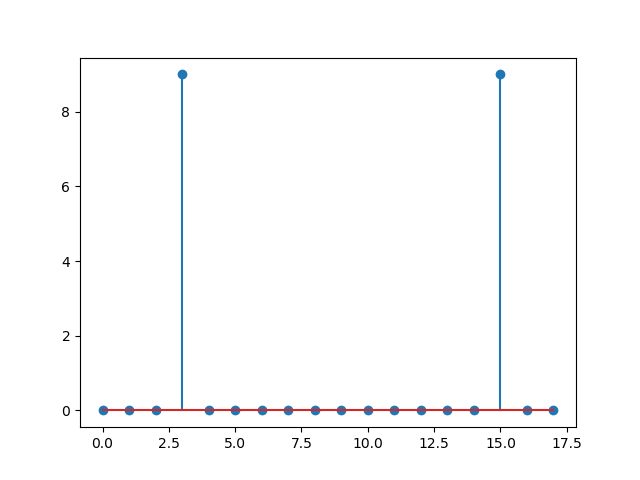

<StemContainer object of 3 artists>

In [30]:
### KOD
xDft = fft.fft(x)
pyplot.figure()
pyplot.stem(np.abs(xDft))

6. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijene grafike sa odgovarajućim graficima iz tačke 3. U čemu su njihove sličnosti i razlike?

<IPython.core.display.Javascript object>


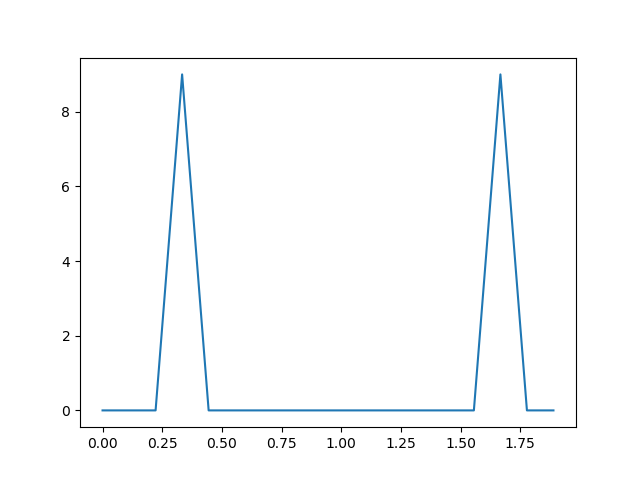

<IPython.core.display.Javascript object>


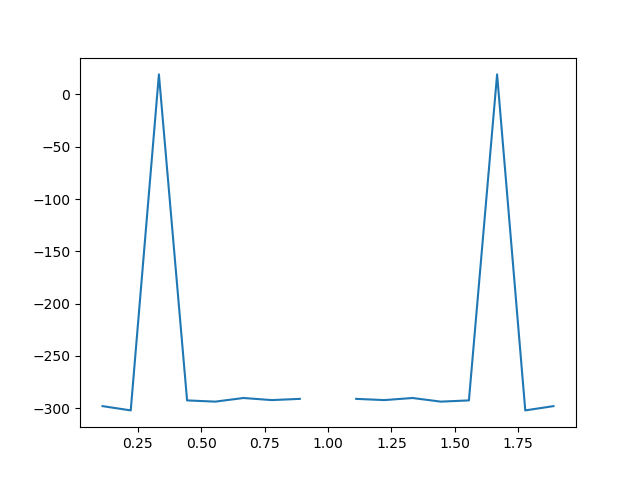

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [31]:
### KOD
freq = (2 * n) / (3 * N)
pyplot.figure()
pyplot.plot(freq, np.abs(xDft))
pyplot.figure()
pyplot.plot(freq, 20 * np.log10(np.abs(xDft)))

## Preklapanje u vremenskom domenu

1. Dat je signal $x(n) = a^{n} u(n)$. Spektar ovog signala je dat sa $ X\left(e^{j\omega}\right) = \frac{\displaystyle 1}{\displaystyle 1 - a e^{-j\omega}}$. Generisati odmjerke spektra dobijene odmjeravanjem u N=5 i N=50 tačaka. Nacrtati dobijene diskretizovane spektre.

<IPython.core.display.Javascript object>


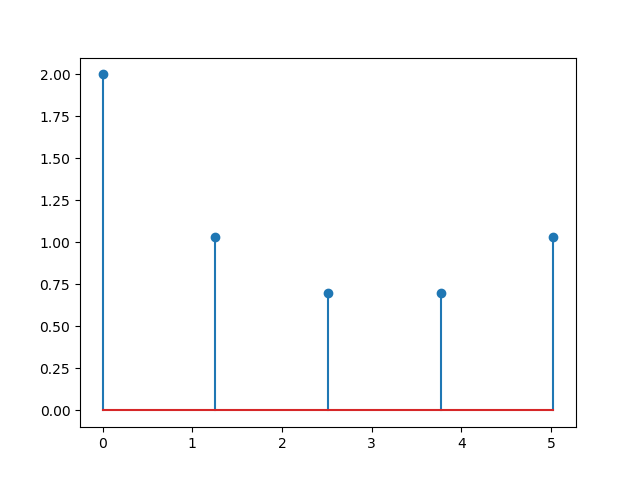

<IPython.core.display.Javascript object>


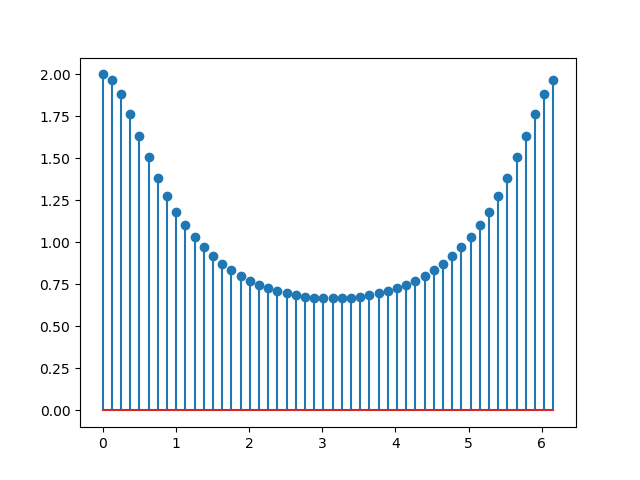

<StemContainer object of 3 artists>

In [48]:
### KOD
N = 5
a = 0.5
n = np.arange(0, N)
w = 2 * n * np.pi / N
X5 = 1 / (1 - a*np.e**(-1j * w))
pyplot.figure()
pyplot.stem(w, np.abs(X5))

N = 50
a = 0.5
n = np.arange(0, N)
w = 2 * n * np.pi / N
X50 = 1 / (1 - a*np.e**(-1j * w))
pyplot.figure()
pyplot.stem(w, np.abs(X50))


2. Korištenjem funkcije ifft rekonstruisati signal na osnovu odmjeraka spektara iz prethodne tačke. Da li se javlja preklapanje u vremenskom domenu?

<IPython.core.display.Javascript object>


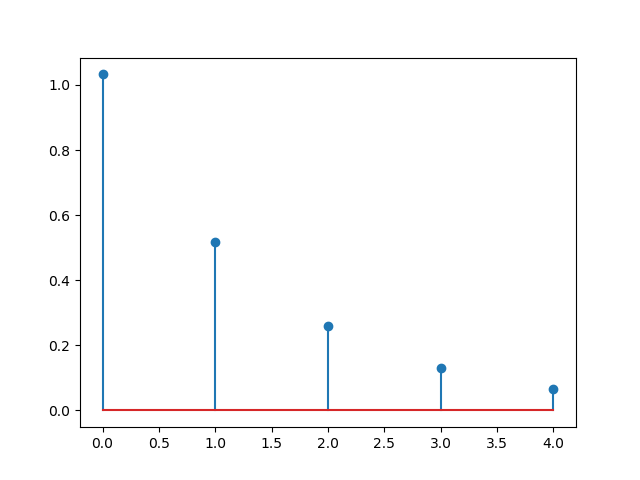

<IPython.core.display.Javascript object>


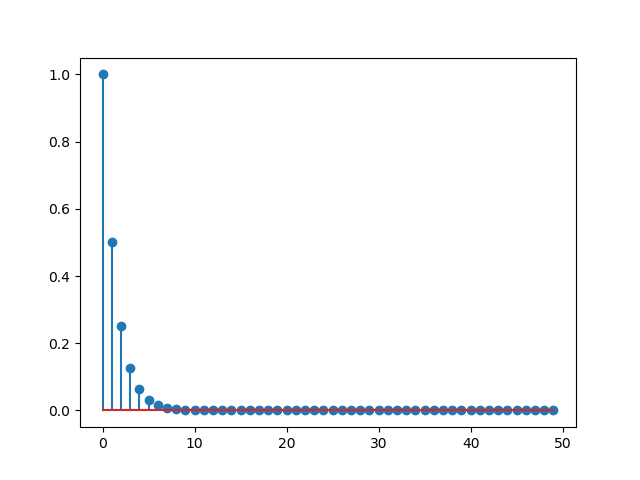

<StemContainer object of 3 artists>

In [49]:
### KOD
result5 = fft.ifft(X5)
result50 = fft.ifft(X50)

pyplot.figure()
pyplot.stem(result5)
pyplot.figure()
pyplot.stem(result50)

## Dopunjavanje nulama

1. Generisati pravougaoni signal
$$
x(n) = \begin{cases}
      1, & 0 \le n \le L-1 \\
      0, & \text{inače}
    \end{cases},
$$za $L = 10$.

In [52]:
### KOD
N = 10
L = 10
n = np.arange(0, N)
x = np.pad(np.ones(L), (0, N - L), mode = "constant", constant_values = 0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


2. Odrediti DFT datog signala u N=50 tačaka uz dopunjavanje nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


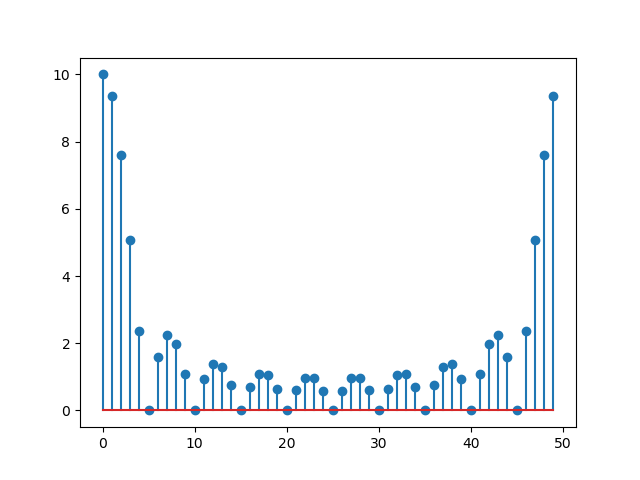

<StemContainer object of 3 artists>

In [54]:
### KOD
xDft = fft.fft(x, 50)
pyplot.figure()
pyplot.stem(np.abs(xDft))

3. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijeni grafik sa tačnim amplitudnim spektrom signala iz tačke 1.

In [24]:
### KOD

4. Odrediti DFT datog signala u N=100 tačaka uz dopunjavanje nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

In [25]:
### KOD

5. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijeni grafik sa tačnim amplitudnim spektrom signala iz tačke 1.

In [26]:
### KOD

## Filtriranje signala

1. Generisati 120 odmjeraka signal
$$
x(n) = cos\left(\frac{\displaystyle \pi}{2}n\right) + cos\left(\frac{\displaystyle \pi}{3}n\right) + cos\left(\frac{\displaystyle \pi}{4}n\right) + cos\left(\frac{\displaystyle \pi}{6}n\right).
$$ Nacratati talasni oblik generisanog signala. Nacrtati amplitudni spektar signala.

In [27]:
### KOD

2. Korištenjem funkcija <a href="https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.buttord.html#scipy.signal.buttord">buttord</a> i <a href="https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter">butter</a> projektovati digitalni filtar sa sledećim zahtjevima:
    - granična frekvencija propusnog opsega 0.3 poluperioda/odmjerku
    - granična frekvencija nepropusnog opsega 0.45 poluperioda/odmjerku
    - maksimalno dozvoljeno slabljenje u propusnom opsegu 3dB
    - minimalno dozvoljeno slabljenje u nepropusnom opsegu 80db

In [28]:
### KOD

3. Nacrati frekvencijsku karakteristiku ovako dobijenog filtra.

In [29]:
### KOD

3. Filtrirati signal iz tačke 1 ovako projektovanim filtrom. Nacrati talasni oblik i amplitudni spektar dobijenog signala.

In [30]:
### KOD

4. Korištenjem funkcija <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html#scipy.signal.ellipord">ellipord</a> i <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip">ellip</a> projektovati digitalni filtar sa sledećim zahtjevima:
    - granična frekvencija propusnog opsega 0.3 poluperioda/odmjerku
    - granična frekvencija nepropusnog opsega 0.45 poluperioda/odmjerku
    - maksimalno dozvoljeno slabljenje u propusnom opsegu 3dB
    - minimalno dozvoljeno slabljenje u nepropusnom opsegu 80db

In [31]:
### KOD

5. Nacrati frekvencijsku karakteristiku ovako dobijenog filtra.

In [32]:
### KOD

6. Filtrirati signal iz tačke 1 ovako projektovanim filtrom. Nacrati talasni oblik i amplitudni spektar dobijenog signala. Komentarisati razlike u odnosu na rezultate iz tačke 3.

In [33]:
### KOD